In [109]:
import sys

In [110]:
import sklearn

In [111]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd  #provides a dataframe
import urllib.request

In [112]:
# For graph plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# ••••••••••••••••••••••• PART 1 ••••••••••••••••••••••••• 

## GET & Visualize DATA

In [113]:
dataFrame = pd.read_csv('data.csv') #loads the data.csv into a panda dataframe

In [114]:
display(dataFrame.head()) #Display the first five rows of my DataFrame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [115]:
dataFrame.info() #Returns key DataFrame info. E.g data types, attributes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [116]:
#Nominal/ Categorical attribuite

display(dataFrame["diagnosis"].value_counts()) #Returns the unique values of my Categorical attribuite

B    357
M    212
Name: diagnosis, dtype: int64

In [117]:
display(dataFrame.describe()) #Return stats on numerical attributes(all my Columns) in Data set

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [118]:
# print(dataFrame.DESCR)

In [119]:
# dataFrame.hist(bins=50, figsize=(20,15)) #Returns a histogram for all numerical attributes
# plt.show()

## Data Cleaning & Prep

1. Drop "id": This column/attribute is not necessary cause Panda lib already indexed my data
2. Drop "Unnamed: 32": All data in this column/attribute is null
3.  Convert Categorical Attribute's values to "int"
4.  Order, Group, & Correlates attributes



#### Drop Attribute

In [120]:
cancerDF = dataFrame # Make copy of dataframe variable
cancerDF = cancerDF.drop("id", axis=1)
cancerDF = cancerDF.drop("Unnamed: 32", axis=1)
display(cancerDF.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Convert Categorical Attribute
This is done to prep for future machine learning algorithms

In [121]:
 cancerDF['diagnosis'] = cancerDF['diagnosis'].map({'M' : 1, 'B' : 0})
display(cancerDF["diagnosis"].value_counts()) #Returns the unique values of my Categorical attribuite

## sklearn OrdinalEncoder class is used to convert categorical values to numbers
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# cancerDF_encoded = ordinal_encoder.fit_transform(cancerDF)

0    357
1    212
Name: diagnosis, dtype: int64

#### Order & Group Attributes
Just makes it easy to Display and compare our attribute in a Correlation Matrix

In [122]:
mean_Attributes = list(cancerDF.columns[1:11]) #Mean
worst_Attributes = list(cancerDF.columns[21:31]) #Worst
se_Attributes = list(cancerDF.columns[11:21]) #Standard Error

# mean_Attributes
# se_Attributes
# worst_Attributes

In [123]:
# ADD "diagnosis" attribute to each variable/ grouping

worst_Attributes.append('diagnosis') #Worst
mean_Attributes.append('diagnosis') #Mean
se_Attributes.append('diagnosis') #Standard Error

#### Correlates Attributes
1. Searching for attributes which correlate with 'diagnosis'(object/ target attribute) 
2. Above attributes should not correlate with each other(avoiding redundant attributes)

In [124]:
corr_Matrix = cancerDF[mean_Attributes].corr()
# corr_Matrix = cancerDF[worst_Attributes].corr()
# corr_Matrix = cancerDF[se_Attributes].corr()

corr_Matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


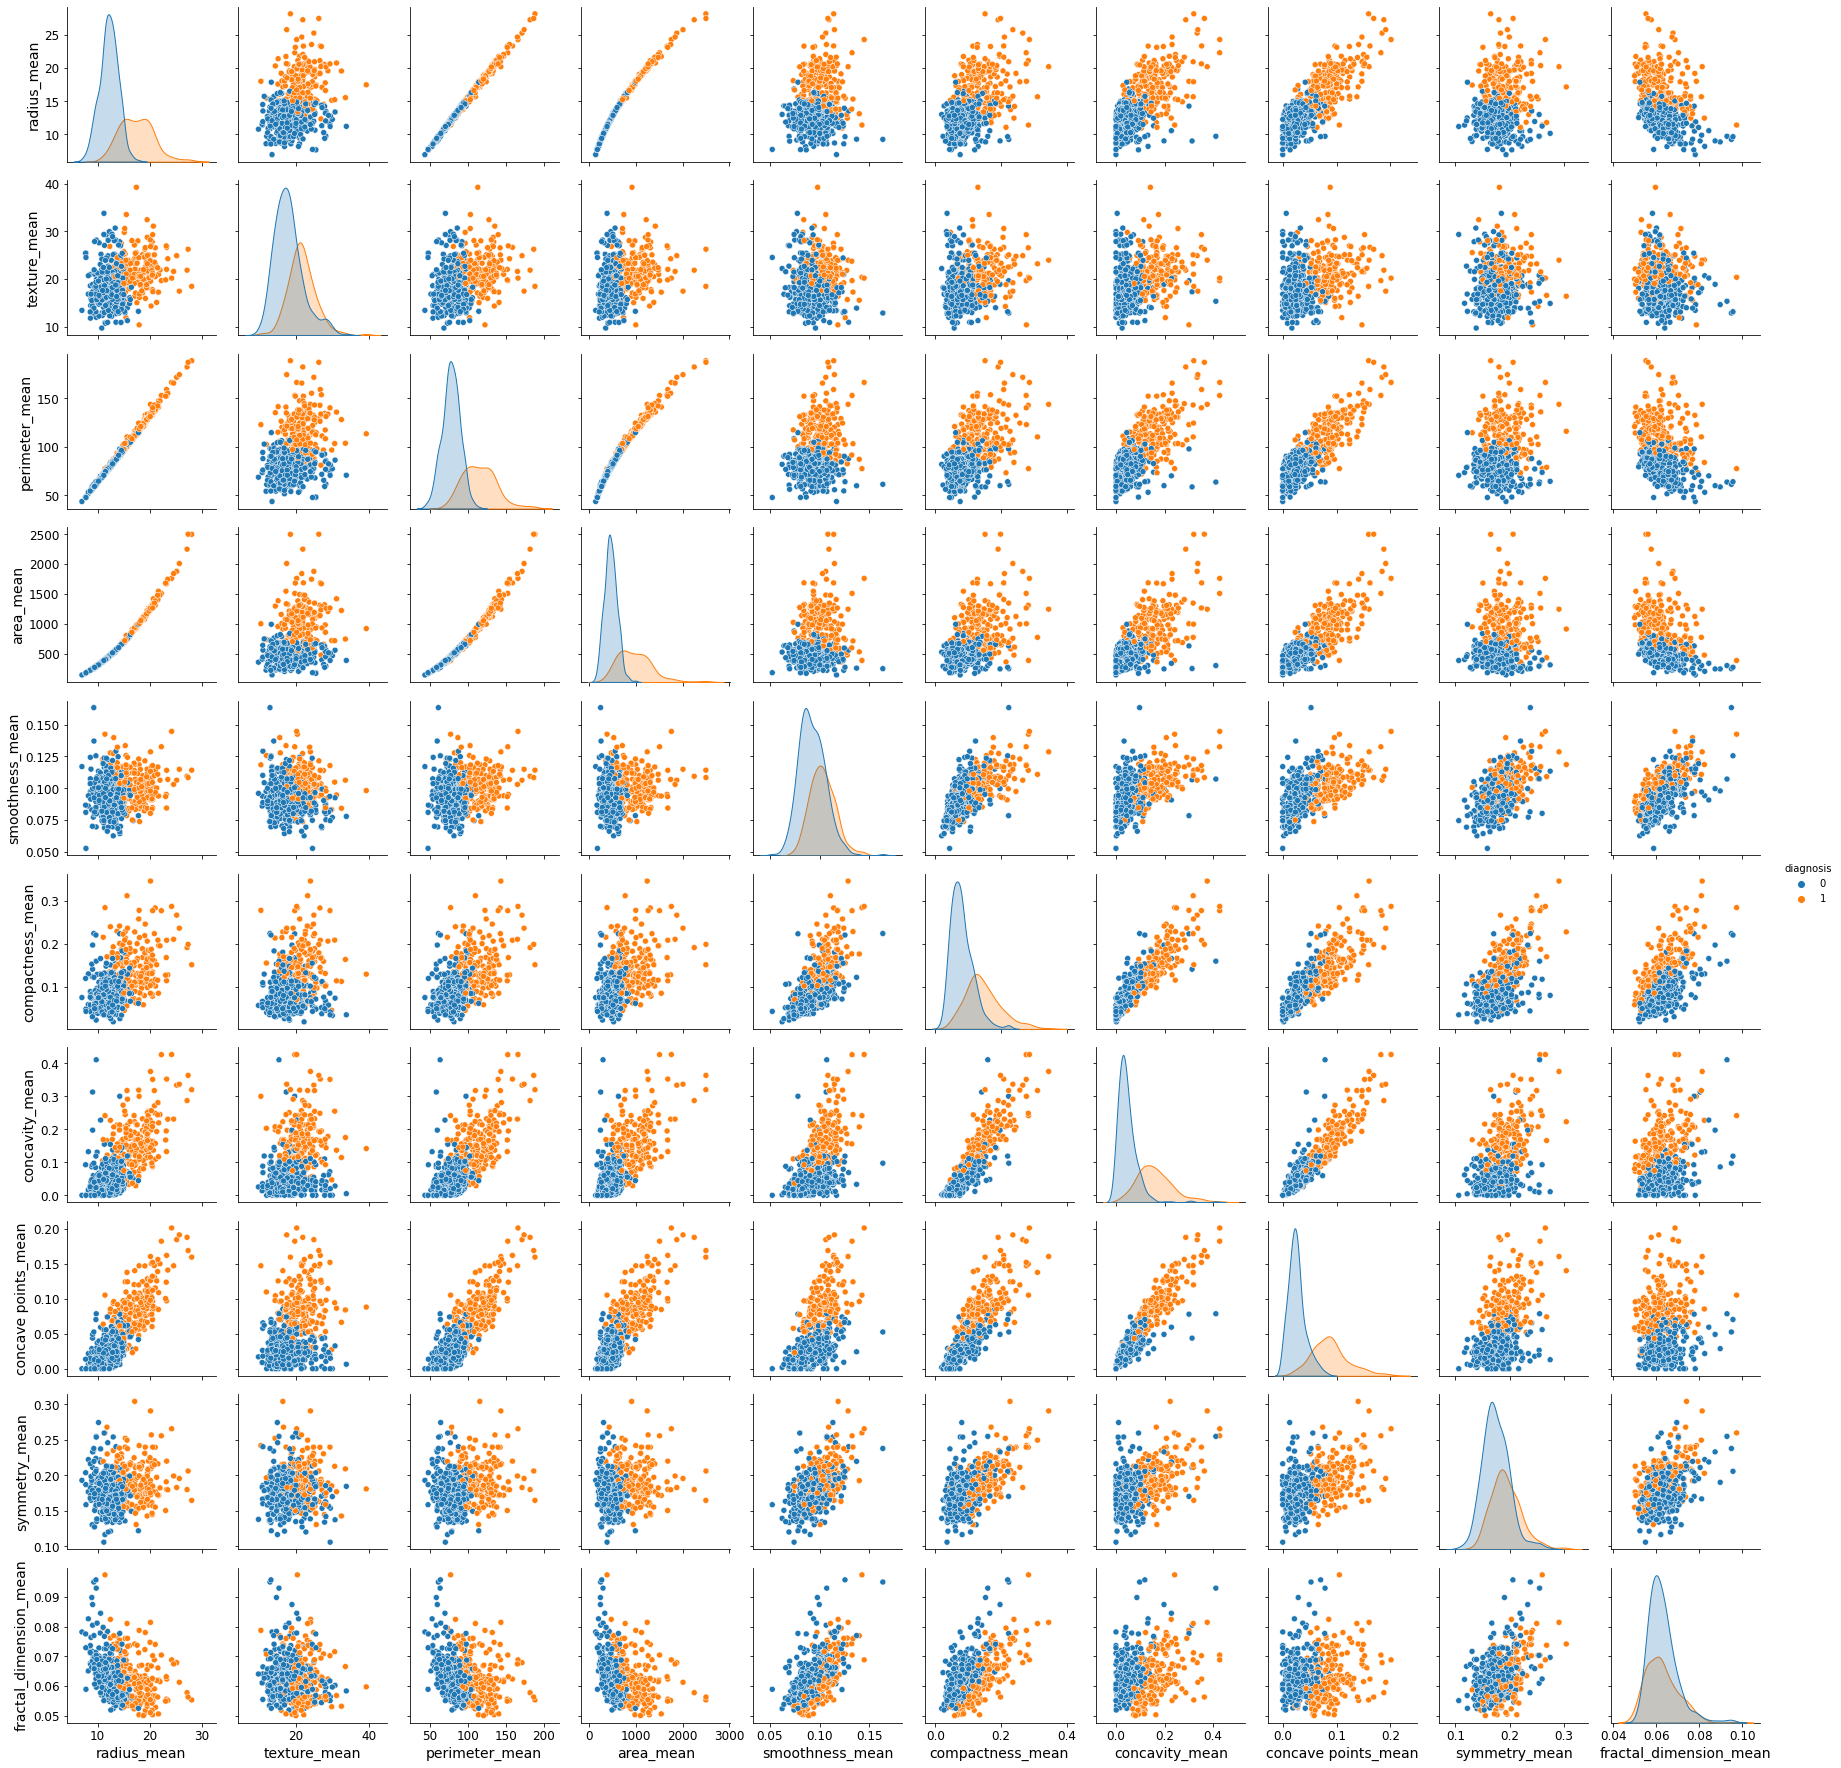

In [125]:
 #Scatter Plot Mattrix Creation
import seaborn as sns  

sns.pairplot(data=cancerDF[mean_Attributes], hue='diagnosis')
# sns.pairplot(data=cancerDF[worst_Attributes], hue='diagnosis')
# sns.pairplot(data=cancerDF[se_Attributes], hue='diagnosis')

#### Attributes Selection

In [126]:
prognosis_Attributes = ['radius_mean','concavity_mean','compactness_mean','concave points_worst',
                        'concavity_worst','compactness_worst','radius_se']

## ORIGINAL Attribute List
# prognosis_Attributes = ['radius_mean','perimeter_mean','area_mean','concave points_mean','concavity_mean',
#                         'compactness_mean','radius_worst','perimeter_worst','area_worst','concave points_worst',
#                         'concavity_worst','compactness_worst','radius_se','perimeter_se','area_se']

## STEPS FOLLOWED
## -High correlation between radius_mean, perimeter_mean, area_mean (above 90%). So pick just one = radius_mean and remove the others.
## -High correlation between radius_mean, radius_worst, perimeter_worst, area_worst (above 90%). So pick just one = radius_mean and remove the others.
## -High correlation between concave points_mean, concavity_mean, concave points_worst (above 90%). So remove concave points_mean alone cause without it concavity_mean and concave points_worst do not correlate highly with other attributes.
## -High correlation between radius_se, perimeter_se, area_se (above 90%). So pick just one = radius_se, remove the others.

<AxesSubplot:>

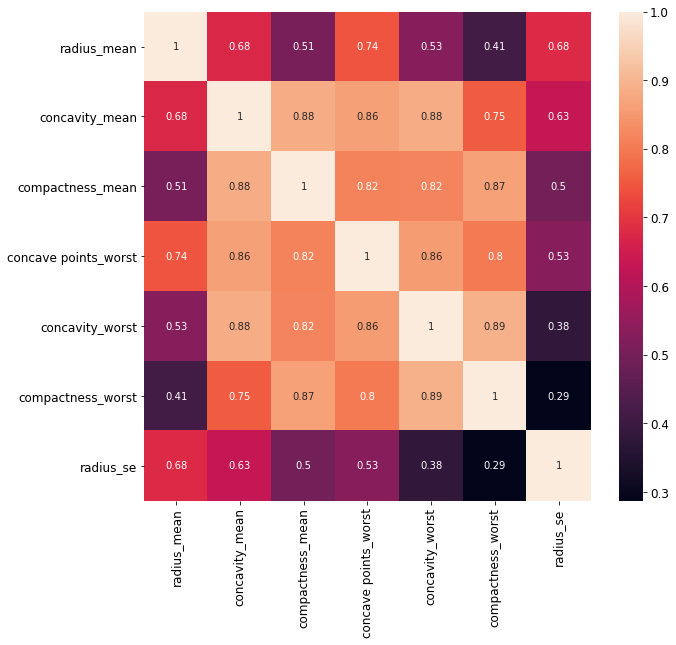

In [127]:
plt.figure(figsize=(10,9))
sns.heatmap(cancerDF[prognosis_Attributes].corr(), annot=True)

### Normalise the data
1. Split dataset into train and test sets
2. Instance normalization

#### Dataset split

In [128]:
from sklearn.model_selection import train_test_split

# Split is TEST Set= 30% | TRAIN Set= 70% 
train, test = train_test_split(cancerDF,test_size=0.3,random_state=40) #

In [129]:
# X: Features I HOPE can of detecting if patiant has cancer or NOT
X_train = train[prognosis_Attributes]
X_test = test[prognosis_Attributes]

# Y: Actually Knows if the patiant has cancer or NOT
y_train = train['diagnosis']
y_test = test['diagnosis']


#### Instance Normalization/ Scaling
Done to bring all attribute instances to the same level of magnitude (same range)

In [130]:
## Rough Idea: |y = (x – mean) / standard deviation|
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# X_train

## ML Model Training
1. Naïve Bayes

In [131]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB 

#Instantiate and fit ML model
nb = GaussianNB()
nb.fit(X_train, y_train) #

GaussianNB()

In [132]:
#test model
prognosis_prediction = nb.predict(X_test)

# ML Model Testing
1. Confusion Matrix
2. Precision
3. Recall
4. Accuracy score
5. F1 score
6. Cross Validation Score

#### Confusion Matrix

In [133]:
#Calculating the confusion matrix of ML Model
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prognosis_prediction) #INPUT: True/correct values| My prdicted Values

#             RESULT:
# [111,   4],
# [  3,  53]
# TP= 111 correct preditions(Malignant)| FP= 4 Wrong preditions(Malignant)
# FN= 3 Wrong preditions(Benign)       | TN= 53 correct preditions(Benign)

array([[111,   4],
       [  3,  53]])

#### Precision
$\large{precision = \frac{TP}{TP+FP}}$

In [134]:
from sklearn.metrics import precision_score

precision_score(y_test, prognosis_prediction) #INPUT: True/correct values| My prdicted Values
#RESULT: 0.9298245614035088

0.9298245614035088

#### Recall  
$\large{recall = \frac{TP}{TP+FN}}$

In [135]:
from sklearn.metrics import recall_score

recall_score(y_test, prognosis_prediction) #INPUT: True/correct values| My prdicted Values
#RESULT: 0.9464285714285714

0.9464285714285714

#### Accuracy

In [136]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prognosis_prediction) #INPUT: True/correct values| My prdicted Values
#RESULT: 0.9590643274853801

0.9590643274853801

#### F1 score
$\large{ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times\frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN+FP}{2}} }$

In [137]:
from sklearn.metrics import f1_score

f1_score(y_test, prognosis_prediction)#INPUT: True/correct values| My prdicted Values
#RESULT: 0.9380530973451328

0.9380530973451328

#### Cross Validation Score

In [138]:
from sklearn.model_selection import cross_val_score

cross_val_score(nb, X_train, y_train, cv=3, scoring="accuracy") #INPUT= CLassifier| data| label| 'Folds'| compare accuracy
#RESULT: [0.90977444, 0.88721805, 0.90909091]

array([0.90977444, 0.88721805, 0.90909091])

### The ROC curves & Area
1. probability
2. Area under ROC Curve
3. ROC plot

In [139]:
# ROC
#     Summaries the prediction performance of a ML classification model 
#     at all classifcation thresholds as a function of the 'True positve rate'

# A plot of the True positve rate Vs False positve rate for every possible classifcation thresholds.

###### Probability

In [140]:
# Prediction probability data matrices 
pred_prob = nb.predict_proba(X_test)  # Prediction probability

# Get probability of a positive Prediction
pred_prob = pred_prob[:,1]

# wrong_probs
# pred_prob

###### ROC Area

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#           Area under ROC Curve
#pred_prob
nb_auc = roc_auc_score(y_test, pred_prob)   #INPUT: True/correct values| My positive Prediction probability

nb_auc

0.9773291925465839

###### ROC Plot

In [142]:
# Calculate ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred_prob)#INPUT: True/correct values| My positive Prediction probability

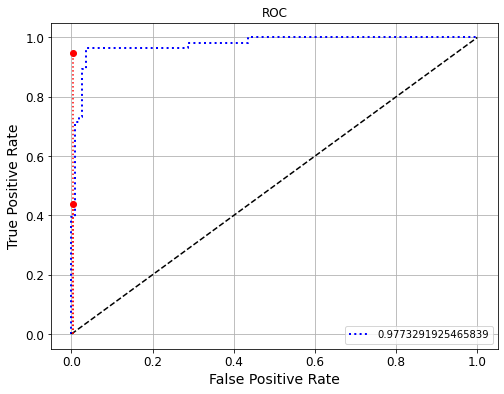

In [143]:
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, "b:", linewidth=2, label= nb_auc)
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])
plt.grid(True)

#(DELETE) RED LINES
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
##############




# Title
plt.title('ROC')
# Labels for Axis 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Labels
plt.legend(loc="lower right", fontsize=10)
# Show plot
plt.show()



## •••••••• 3 Data sets •••••••• 

#### DataSet 1

In [144]:
dataSet_1 = cancerDF # Make copy of dataframe variable
# display(dataSet_1.head())
# dataSet_1_Attributes = ['radius_mean','concavity_mean','compactness_mean','concave points_worst']
dataSet_1_Attributes = ['smoothness_mean','fractal_dimension_mean','symmetry_mean','texture_mean']

# Split is TEST Set= 30% | TRAIN Set= 70% 
train, test = train_test_split(dataSet_1,test_size=0.3,random_state=40) #

# X: Features I HOPE can of detecting if patiant has cancer or NOT
a_train = train[dataSet_1_Attributes]
a_test = test[dataSet_1_Attributes]

# Y: Actually Knows if the patiant has cancer or NOT
b_train = train['diagnosis']
b_test = test['diagnosis']

# Normalise
a_train = scale.fit_transform(a_train)
a_test = scale.fit_transform(a_test)

#Instantiate and fit ML model
nb.fit(a_train, b_train) #

#test model
dataSet_1_prediction = nb.predict(a_test)

#Major Performance Metrics.
from sklearn.metrics import classification_report

print(classification_report(b_test, dataSet_1_prediction))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       115
           1       0.67      0.66      0.67        56

    accuracy                           0.78       171
   macro avg       0.75      0.75      0.75       171
weighted avg       0.78      0.78      0.78       171



#### DataSet 2

In [145]:
dataSet_2 = cancerDF # Make copy of dataframe variable
# display(dataSet_2.head())

dataSet_2_Attributes = ['compactness_mean','radius_worst','perimeter_worst','area_worst','concave points_worst',
                         'concavity_worst','compactness_worst','radius_se','perimeter_se','area_se']

# Split is TEST Set= 30% | TRAIN Set= 70% 
train, test = train_test_split(dataSet_2,test_size=0.3,random_state=40) #

# X: Features I HOPE can of detecting if patiant has cancer or NOT
c_train = train[dataSet_2_Attributes]
c_test = test[dataSet_2_Attributes]

# Y: Actually Knows if the patiant has cancer or NOT
d_train = train['diagnosis']
d_test = test['diagnosis']

# Normalise
c_train = scale.fit_transform(c_train)
c_test = scale.fit_transform(c_test)

#Instantiate and fit ML model
nb.fit(c_train, d_train) #

#test model
dataSet_2_prediction = nb.predict(c_test)

#Major Performance Metrics.
from sklearn.metrics import classification_report

print(classification_report(d_test, dataSet_2_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.95      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



#### DataSet 3

In [146]:
dataSet_3 = cancerDF # Make copy of dataframe variable
# display(dataSet_3.head())


dataSet_3_Attributes = ['smoothness_mean', 'fractal_dimension_mean', 'symmetry_mean', 'texture_mean','radius_mean',
                        'perimeter_mean','area_mean','concave points_mean','concavity_mean',
                         'compactness_mean','radius_worst','perimeter_worst','area_worst','concave points_worst',
                         'concavity_worst','compactness_worst','radius_se','perimeter_se','area_se','compactness_se']


# Split is TEST Set= 30% | TRAIN Set= 70% 
train, test = train_test_split(dataSet_3,test_size=0.3,random_state=40) #

# X: Features I HOPE can of detecting if patiant has cancer or NOT
e_train = train[dataSet_3_Attributes]
e_test = test[dataSet_3_Attributes]

# Y: Actually Knows if the patiant has cancer or NOT
f_train = train['diagnosis']
f_test = test['diagnosis']

# Normalise
e_train = scale.fit_transform(e_train)
e_test = scale.fit_transform(e_test)

#Instantiate and fit ML model
nb.fit(e_train, f_train) #

#test model
dataSet_3_prediction = nb.predict(e_test)

#Major Performance Metrics.
from sklearn.metrics import classification_report

print(classification_report(f_test, dataSet_3_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.93      0.93        56

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# ••••••••••••••••••••••• PART 2 ••••••••••••••••••••••••• 

### CLUSTERING (Unsupervised Machine Learning)
1. Dataset Setup
2. PCA (Principal Component Analysis)
3. K-Means Clustering
4. Plot Decision Boundaries 
5. Inertia & Score (Customer Evaluation)
6. Elbow plot
7. Gaussian Mixture Model
8. Silhouette
9. kMeans.transform

#### Dataset Setup

In [147]:
cluster_df = cancerDF  #Make copy of dataframe variable
# display(cluster_df.head())

#Creating Label
X_cluster = cluster_df.drop('diagnosis', axis=1).values #
Y_cluster = cluster_df['diagnosis'].values

# Normalise (Standard Scaler)
X_cluster = scale.fit_transform(X_cluster)

# X_cluster
# Y_cluster

#### PCA (Principal Component Analysis)

In [148]:
# from sklearn.decomposition import IncrementalPCA

# pca = IncrementalPCA(n_components = 2)
# X_cluster = pca.fit_transform(X_cluster)
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=42)
X_cluster = pca.fit_transform(X_cluster)


#Dimension reduction by means of compressing the dataset and then holding onto only the most relevant
#info which is then used to create "principal components"
#  (so from a large amount of correlated variables to a smaller amount of uncorrelated variables)


#### K-Means Clustering

In [149]:
from sklearn.cluster import KMeans #Training Cluster Model

k = 2 #Number of clusters
kMeans = KMeans(n_clusters=k, random_state=42).fit(X_cluster)
pred_cluster = kMeans.fit_predict(X_cluster) #Pass our data to train our model
# pred_cluster

# This is an example of hard clustering where in each instance is assigning to a single cluster.

#### Some Checks

In [150]:
# Array where the model stores predictions
pred_cluster is kMeans.labels_

True

In [151]:
#Return Centroid Estimates (cluster centroids are stored in cluster_centers_)
kMeans.cluster_centers_

array([[-2.20247773, -0.02171612],
       [ 4.35883027,  0.04297744]])

In [152]:
#Instances and their labels/cluster index  
kMeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

#### Plot Decision Boundaries 

In [153]:
#making the graph colourful labeled, & demacated 

def plot_data(X_cluster):
    plt.plot(X_cluster[:, 0], X_cluster[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=1, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X_cluster, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X_cluster.min(axis=0) - 0.1
    maxs = X_cluster.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X_cluster)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

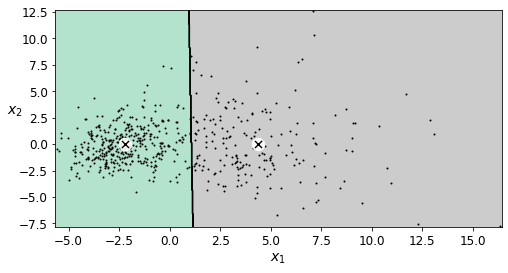

In [154]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kMeans, X_cluster)
plt.show()

#### Inertia

In [155]:
kMeans.inertia_

# Inertia
# Is used to measures the parformance of the cluster generated by kMeans.
# This is done by calculating the distance between each datapoint and its centroid.

5332.555574204259

In [156]:
#.SCORE returns negative Inertia
kMeans.score(X_cluster)

-5332.555574204259

#### Elbow plot

<function matplotlib.pyplot.show(close=None, block=None)>

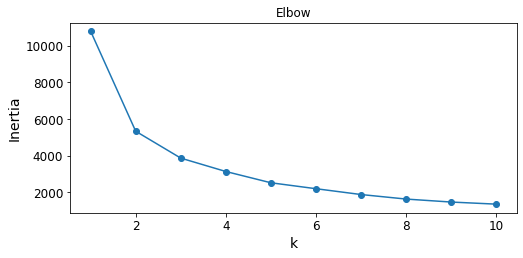

In [157]:
inertia_array = []

K = range(1,11)

for i in K:
    kMeans_plot = KMeans(n_clusters = i, random_state=42).fit(X_cluster)
    inertia_array.append(kMeans_plot.inertia_)
    
    
plt.figure(figsize=(8, 3.5))
plt.plot(K, inertia_array, marker = 'o')
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title('Elbow')

plt.show
    
#Done in order to select the most optimal number of clusters(k) for this dataset.
#pick the value(number of clusters) at which the Diagram's curve stops being so steep (no more significant change)

#### Soft Clustering

In [158]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2, covariance_type="full")
GMM_predict = GMM.fit_predict(X_cluster)

# Gaussian Mixture Models (GMMs)
# This is an example of soft clustering, in which each attribute is given a probabilistic valued and 
# assigned to a cluster based on that Value. Useful for Comparing two collection of data(test and train sets) 
# to see if they differ.
GMM_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [159]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(X_cluster, GMM_predict)

# Silhouette score or coefficients 
# Is basically the mean of all individual attribute’s Silhouette. It is used for measuring accuracy of a clustering Algorithm.
# (Attribute’s Silhouette= mean of all attribute distances from our attribute in question). 
# Its results span from -1 to +1. Where:
# 1 = High degree of cluster separation
# -1 = Low degree of cluster separation


0.47392093751823977

In [160]:
from sklearn.cluster import KMeans

kMeans.transform(X_cluster)

array([[11.56439677,  5.1960516 ],
       [ 5.92508193,  4.29066561],
       [ 8.0059856 ,  1.77230605],
       ...,
       [ 3.93686317,  3.66203969],
       [12.69080274,  6.23262126],
       [ 3.33647907,  9.85993145]])

# ••••••••••••••••••••••• PART 3 ••••••••••••••••••••••••• 

### Decision Trees & Random Forests (Supervised Machine Learning)
1. Dataset Setup
2. Decision Tree
3. Random forests
4. ML Model Testing

#### Dataset Setup

In [161]:
trees_df = cancerDF  #Make copy of dataframe variable
# display(trees_df.head())

### Normalise the data
1. Split dataset into train and test sets
2. Instance normalization

In [162]:
# Split is TEST Set= 30% | TRAIN Set= 70% 
tree_train, tree_test = train_test_split(trees_df, test_size=0.3, random_state=40) #

# # ----Move 30% of instances from training set to the testing set----
# tree_train, tree_test = train_test_split(trees_df, test_size=0.6, random_state=40) # Accuracy= 0.89

# # ----Move 60% of instances from training set to the testing set----
# tree_train, tree_test = train_test_split(trees_df, test_size=0.9, random_state=40) # Accuracy= 0.69

In [163]:
# X: Features I HOPE can of detecting if patiant has cancer or NOT
X_tree_train = tree_train[prognosis_Attributes]
X_tree_test = tree_test[prognosis_Attributes]

# Y: Actually Knows if the patiant has cancer or NOT
y_tree_train = tree_train['diagnosis']
y_tree_test = tree_test['diagnosis']

#### Instance Normalization/ Scaling
Done to bring all attribute instances to the same level of magnitude (same range)

In [164]:
## Rough Idea: |y = (x – mean) / standard deviation|
X_tree_train = scale.fit_transform(X_tree_train)
X_tree_test = scale.fit_transform(X_tree_test)

# X_tree_train

#### Decision Tree (ML Model)


In [165]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features="auto", random_state=42)
decision_tree.fit(X_tree_train, y_tree_train)

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=42)

In [166]:
#test model
decision_tree_prediction = decision_tree.predict(X_tree_test)

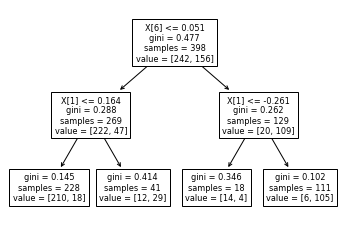

In [167]:
plot_tree(decision_tree);

#### Random Forest (ML Model)


In [168]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_tree_train, y_tree_train)

RandomForestClassifier()

#### ML Model Testing
1. Cross Validation Score (10-fold)
2. Accuracy score
3. Confusion Matrix
4. Precision
5. Recall
6. F measure
7. ROC area

#### Cross Validation (10-fold)

In [169]:
cross_val_score(decision_tree, X_tree_train, y_tree_train, cv=10, scoring="accuracy") #INPUT= CLassifier| data| label| 'Folds'| compare accuracy
#RESULT: [0.95 ,0.9 ,0.9 ,0.925 ,0.9 ,0.875 ,0.925 ,0.9 ,0.92307692, 0.87179487]

array([0.95      , 0.85      , 0.85      , 0.875     , 0.9       ,
       0.8       , 0.875     , 0.875     , 0.84615385, 0.92307692])

#### Accuracy Score

In [170]:
accuracy_score(y_tree_test, decision_tree_prediction) #INPUT: True/correct values| My prdicted Values
#RESULT: 0.9298245614035088

0.9239766081871345

#### Confusion Matrix

In [171]:
confusion_matrix(y_tree_test, decision_tree_prediction) #INPUT: True/correct values| My prdicted Values

#             RESULT:
# [105,   10],
# [  2,  54]
# TP= 105 correct preditions(Malignant)| FP= 10 Wrong preditions(Malignant)
# FN= 2 Wrong preditions(Benign)       | TN= 54 correct preditions(Benign)

array([[106,   9],
       [  4,  52]])

#### Precision

In [172]:
precision_score(y_tree_test, decision_tree_prediction) #INPUT: True/correct values| My prdicted Values
#RESULT: 0.84375

0.8524590163934426

#### Recall

In [173]:
recall_score(y_tree_test, decision_tree_prediction) #INPUT: True/correct values| My prdicted Values
#RESULT: 0.9642857142857143

0.9285714285714286

#### F measure 

In [174]:
f1_score(y_tree_test, decision_tree_prediction)#INPUT: True/correct values| My prdicted Values
#RESULT: 0.8999999999999999

0.888888888888889

#### Prediction

In [175]:
# Prediction probability data matrices 
decision_tree_pred_prob = decision_tree.predict_proba(X_tree_test)  # Prediction probability

# Get probability of a positive Prediction
decision_tree_pred_prob = decision_tree_pred_prob[:,1]

#### ROC area

In [176]:
#           Area under ROC Curve
#pred_prob
decision_tree_auc = roc_auc_score(y_tree_test, decision_tree_pred_prob)   #INPUT: True/correct values| My positive Prediction probability

decision_tree_auc

0.9370341614906832

# ••••••••••••••••••••••• PART 4 ••••••••••••••••••••••••• 

### Neural Networks and Convolutional Neural Networks
1. 
2. 
3. 
4. 

#### Import Libraries 

In [177]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam




%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print(tf.__version__)

2.7.0


#### Dataset Creation & Split

In [178]:
X = cancerDF.drop("diagnosis", axis=1)
# X.head()

In [179]:
Y = cancerDF['diagnosis'].values
# Y

In [180]:
X_neural_train, X_neural_test, y_neural_train, y_neural_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


In [181]:
X_neural_train.shape

(455, 30)

In [182]:
X_neural_test.shape

(114, 30)

#### Normalization

In [183]:
## Rough Idea: |y = (x – mean) / standard deviation|
X_neural_train = scale.fit_transform(X_neural_train)
X_neural_test = scale.fit_transform(X_neural_test)

# X_neural_train

#### Reshape Data (optional)

In [184]:
X_neural_train = X_neural_train.reshape(455, 30, 1)
X_neural_test = X_neural_test.reshape(114, 30, 1)

In [185]:
X_neural_test.shape

(114, 30, 1)

In [186]:
X_neural_train.shape

(455, 30, 1)

#### Build Model (CNN)

In [187]:

model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [188]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

In [189]:
history = model.fit(X_neural_train, y_neural_train, epochs=20, validation_data = (X_neural_test, y_neural_test), verbose = 1)


Epoch 1/20
15/15 [==============================] - 1s 37ms/step - loss: 0.4110 - accuracy: 0.8374 - val_loss: 0.4029 - val_accuracy: 0.9649
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.9560 - val_loss: 0.3239 - val_accuracy: 0.9123
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1391 - accuracy: 0.9626 - val_loss: 0.3171 - val_accuracy: 0.8947
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0943 - accuracy: 0.9714 - val_loss: 0.3130 - val_accuracy: 0.8684
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0866 - accuracy: 0.9648 - val_loss: 0.3274 - val_accuracy: 0.8421
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0896 - accuracy: 0.9670 - val_loss: 0.3415 - val_accuracy: 0.8070
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9736 - val_loss: 0.3483 - val_accuracy: 0.7982
Epoch 8/20
15/15 [=

#### Evaluation

In [190]:
test_loss, test_acc = model.evaluate(X_neural_test,  y_neural_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9473684430122375


#### DataSet Copy, Slipt & Normalization for MLP

In [191]:
#Copy Dataset
X = cancerDF.drop("diagnosis", axis=1)
Y = cancerDF['diagnosis'].values

#Training Test Split
X_neural_train, X_neural_test, y_neural_train, y_neural_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify = Y)

#Dataset Normalisation
X_neural_train = scale.fit_transform(X_neural_train)
X_neural_test = scale.fit_transform(X_neural_test)



#### Multilayer Perceptron (MLP)

In [192]:
from sklearn.neural_network import MLPClassifier

  # Actual Model training
mlp = MLPClassifier(max_iter=1000, alpha=0.1, activation='logistic', solver='adam', random_state=42) 
mlp.fit(X_neural_train, y_neural_train) 
 
 # Model Evaluation
mlp_predict = mlp.predict(X_neural_test)

print(classification_report(y_neural_test, mlp_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.92      0.95      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

